# Data Wrangling Project


## Table of Contents
- [Introduction](#intro)
- [Gathering Data](#gather)
- [Assessing Data](#assess)
- [Cleaning Data](#clean)
- [Analysing and Visualising](#analyse)

<a id='intro'></a>
## Introduction
This project is separated into 5 sections
- Gathering data
- Assessing data
- Cleaning data
- Analysing and Visualising
- Reporting

Start with importing the required libraries.

In [1]:
# import relavant libraries for analysis
import numpy as np
import pandas as pd
import os
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='gather'></a>
## Gathering Data
There are 3 data sources:
1. Tweet archives of Twitter user @dog_rates, aka WeRateDogs.
2. Twitter API
3. Additional image prediction data provided by Udacity

We will go through the sources one by one.

### A. Twitter Archive

In [2]:
# use pandas read_csv module to parse flat files
df_archive = pd.read_csv('twitter-archive-enhanced-2.csv', sep=',')

### B. Twitter API
Tweepy is used to obtain additional information of:
- retweet_count
- favourite_count
- language

Tweepy API below is for reference.

*Tweepy is not used because the access Twitter Developer account is not available.*

We can read the text file into a Pandas Dataframe by:

1. Read text file into a list, create a dataframe from it
2. Use Pandas parsing module to read the text file

In [3]:
# Method 1.
# read the text file into a list in python
# json structure is representable in python data structure as arrays and dictionaries
json_list = []

with open('tweet-json.txt') as fd:
    # tweet-json.txt records each tweet data in a single line
    for line in fd:
        json_list.append(json.loads(line))
fd.close()

In [4]:
# a glimpse of the json file structure
json_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [5]:
# passing dictionary into pd.Dataframe to create dataframe
df_additional = pd.DataFrame(json_list)

In [6]:
# Method 2.
# using pandas read_json parsing tool
# experimentation for comparision using list.append method
test_additional = pd.read_json('tweet-json.txt', lines=True)

In [7]:
# verified that both method works
list(df_additional) == list(test_additional)

True

In [8]:
# select certain items to keep
extract_list = ['id', 'lang', 'favorite_count','retweet_count']
df_additional = df_additional[extract_list]
df_additional.head()

,id,lang,favorite_count,retweet_count
0,892420643555336193,en,39467,8853
1,892177421306343426,en,33819,6514
2,891815181378084864,en,25461,4328
3,891689557279858688,en,42908,8964
4,891327558926688256,en,41048,9774


### C. Image Prediction Data

Use Requests library to programatically download the file.

In [9]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',
                 stream=True)

with open('image_predictions.tsv', 'wb') as fd:
    for line in r.raw:
        fd.write(line)
fd.close()

In [10]:
# use pandas read_csv module to parse flat files
# use \t to indicate tabs as the separator for .tsv files
df_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

dataframe gathered so far:
- df_archive
- df_additional
- df_prediction

<a id='assess'></a>
## Assessing Data
Looking for quality and tidiness within the data

In [11]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                2354 non-null int64
lang              2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 64.4+ KB


In [13]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [14]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1265,709901256215666688,NaN,NaN,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",WeRateDogs stickers are here and they're 12/10...,NaN,NaN,NaN,"http://goo.gl/ArWZfi,https://twitter.com/dog_r...",12,10,None,None,None,None,None
1626,684800227459624960,NaN,NaN,2016-01-06 18:14:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Theodore. He's dapper as hell. Probably o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684800227...,11,10,Theodore,None,None,None,None
899,758828659922702336,NaN,NaN,2016-07-29 00:57:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758828659...,13,10,None,doggo,None,None,None
89,875021211251597312,NaN,NaN,2017-06-14 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys please stop sending pictures without any ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875021211...,12,10,None,None,None,None,None
334,832682457690300417,NaN,NaN,2017-02-17 20:05:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Prosperous good boy 13/10 socioeconomic af htt...,NaN,NaN,NaN,https://twitter.com/telegraph/status/832268302...,13,10,None,None,None,None,None


In [15]:
df_additional.sample(5)

,id,lang,favorite_count,retweet_count
1463,694352839993344000,en,2244,700
1919,674262580978937856,en,1391,498
1553,688894073864884227,en,2462,792
872,761292947749015552,en,4957,1265
1036,744334592493166593,en,7443,2412


In [16]:
df_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1900,851464819735769094,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg,2,web_site,0.919649,False,menu,0.026306,False,crossword_puzzle,0.003482,False
236,670428280563085312,https://pbs.twimg.com/media/CU3W9ELWEAEdUA0.jpg,1,chow,0.335269,True,golden_retriever,0.305850,True,Tibetan_mastiff,0.063325,True
620,680473011644985345,https://pbs.twimg.com/media/CXGGlzvWYAArPfk.jpg,1,Lakeland_terrier,0.796694,True,West_Highland_white_terrier,0.138709,True,Norwich_terrier,0.016253,True
2040,885167619883638784,https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg,4,malamute,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False


In [17]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
df_additional.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [19]:
df_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
int(df_archive.retweeted_status_id.unique()[1])

887473957103951872

In [22]:
df_archive.rating_numerator.sort_values(ascending=False)[:20]

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
695       75
340       75
1351      60
1202      50
1274      45
Name: rating_numerator, dtype: int64

In [23]:
df_archive.rating_denominator.sort_values(ascending=False)[:20]

1120    170
902     150
1634    130
1779    120
1635    110
1228     90
1254     80
1843     80
433      70
1274     50
1351     50
1202     50
1433     40
1598     20
1165     20
1663     16
342      15
1662     11
1068     11
784      11
Name: rating_denominator, dtype: int64

In [24]:
df_prediction.p1.value_counts()[:10]

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
malamute               30
Name: p1, dtype: int64

### Quality

#### df_archive
- dog_stages: 'None' are stored as objects instead of NaN
- timestamp: stored as object instead of datetime object
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id: indicates retweets and replies
- rating_numerator: outlier numbers (>50)
- rating_denominator: outlier numbers (>50)
- source: strings of url provided instead of the name of the source
- source: stored as object instead of categorical object

#### df_additional
- lesser number of data compared to df_archive

#### df_prediction
- lesser number of data compared to df_archive


### Tidiness

- df_additional and df_archive are part of a single observational unit
- df_archive: pupper, puppo, doggo, floofer are observations of dog_stages variable
- (iterated) df_archive: dog_stages: multiple stages in a single tweet
- df_prediction: p1, p2, p3 are consecutive predictions of the same image, the prediction is a variable


<a id='clean'></a>
## Cleaning Data

Clean the dataframe one at a time, starting from df_archive, to df_additional and df_prediction.

In [25]:
# create a copy with suffix added
df_archive_clean = df_archive.copy()
df_additional_clean = df_additional.copy()
df_prediction_clean = df_prediction.copy()

### df_archive_clean

#### Define
- convert 'None' in pupper, puppo, doggo, floofer columns into NaN
- create new column named 'None' which has a 'None' entry when there are no dog_stages
- use pd.melt function to convert pupper, puppo, doggo, floofer, None columns into a single column named dog_stages
- select the timestamp column and change the datatype into datetime object
- remove rows with in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id
- remove columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- extract name of source from the url provided in source column using regex
- select source column and change the datatype to categorical
- create a separate dataframe to store the dog_stages information and the tweet_id, remove duplicate and drop the dog_stages column from the main dataframe (df_archive_clean)

#### Code

In [26]:
# create a column 'None' and fill it with np.nan
df_archive_clean['None'] = np.nan

# listing out the dog_stages columns
dog_stages_names = ['doggo', 'floofer', 'pupper', 'puppo', 'None']

# convert 'None' to np.nan
for stage in dog_stages_names:
    df_archive_clean[stage] = df_archive_clean[stage].replace('None', np.nan)

In [27]:
# create column_names list without dog_stages_names
column_names = list(df_archive_clean)
for item in dog_stages_names:
    column_names.remove(item)

# boolean mask to capture tweets without any mention of dog_stages
condition_mask = (df_archive_clean.doggo.isnull() & 
                  df_archive_clean.floofer.isnull() & 
                  df_archive_clean.pupper.isnull() & 
                  df_archive_clean.puppo.isnull())

# enter 'None' in 'None' column to the tweets that does not mention any dog_stages
df_archive_clean.loc[condition_mask,'None'] = 'None'

# melt variables into a single column named 'dog_stages'
df_archive_clean = pd.melt(df_archive_clean, id_vars=column_names, value_name='dog_stages' )

# drop the 'variable' column
df_archive_clean = df_archive_clean.drop(labels='variable', axis=1)

# drop the duplicated column with NaN in dog_stages
df_archive_clean = df_archive_clean.dropna(axis=0, subset=['dog_stages'])

# reset index for formatting purposes
df_archive_clean = df_archive_clean.reset_index(drop=True)

In [28]:
# set datatype as datetime
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

In [29]:
# boolean mask to get data with no 
condition_mask = (df_archive_clean.in_reply_to_status_id.isnull() & 
                  df_archive_clean.in_reply_to_user_id.isnull() &
                  df_archive_clean.retweeted_status_id.isnull() &
                  df_archive_clean.retweeted_status_user_id.isnull())
df_archive_clean = df_archive_clean[condition_mask]

In [30]:
# drop non-value-adding columns
column_names_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 
                     'retweeted_status_id', 'retweeted_status_user_id', 
                     'retweeted_status_timestamp']
df_archive_clean = df_archive_clean.drop(labels=column_names_drop, axis=1)

In [31]:
# an example of url in source
df_archive_clean.source[19]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [32]:
# extract source name using regex
regex_pat = r'>(\w+\s?\w+\s?\w+)'
df_archive_clean.source = df_archive_clean.source.str.extract(regex_pat,expand=False)

In [33]:
# change datatype of source to categorical
df_archive_clean.source = df_archive_clean.source.astype('category')

In [34]:
# have a look at the outlier numerator and denominator
print(df_archive_clean[df_archive_clean.rating_numerator > 100].text.sample(1).item())

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE


**Comments**

---

1. It seems like the unreasonable numerator and denominator numbers are part of the tweet and not an extraction error. We will leave it for now and possibly remove the outliers in the future, if it affects the analysis

2. To resolve the duplicated tweet_id problem, we will create a separate dataframe to store the dog_stages information. This will keep the tweet_id unique for every entry

In [35]:
# resolve duplicated tweet_id
# create df_stages_clean to store dog_stages and tweet_id from main df
df_stages_clean = df_archive_clean[['tweet_id', 'dog_stages']]

# drop dog_stages column in main df
df_archive_clean = df_archive_clean.drop(labels='dog_stages', axis=1)

In [36]:
# change dog_stages datatype to categorical
df_stages_clean.dog_stages = df_stages_clean.dog_stages.astype('category')

# drop duplicates in tweet_id
df_archive_clean = df_archive_clean.drop_duplicates(subset='tweet_id', keep='first')

#### Test

In [37]:
# check for the dog_stages values
df_stages_clean.dog_stages.value_counts()

None       1761
pupper      230
doggo        83
puppo        24
floofer      10
Name: dog_stages, dtype: int64

In [38]:
# check for duplication in primary key, tweet_id
df_archive_clean.tweet_id.duplicated().any()
# if duplication detected
# resolve in comment section above

False

In [39]:
duplicated_id_list = list(df_archive_clean[df_archive_clean.tweet_id.duplicated()].tweet_id)

In [40]:
# check extracted source names from url
df_archive_clean.source.value_counts()

Twitter for iPhone    1964
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

In [41]:
# check dtype of timestamp, source
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2369
Data columns (total 8 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null category
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(3)
memory usage: 108.6+ KB


In [42]:
df_stages_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2369
Data columns (total 2 columns):
tweet_id      2108 non-null int64
dog_stages    2108 non-null category
dtypes: category(1), int64(1)
memory usage: 99.1 KB


### df_additional

#### Define
- merge df_additional_clean on df_archive_clean, using df_archive_clean as the main dataframe, and tweet_id as the primary key


#### Code

In [43]:
# merge df_archive_clean on tweet_id and df_additional_clean on id
df_archive_merged = pd.merge(df_archive_clean, df_additional_clean, how='left', left_on='tweet_id', right_on='id')

# drop repeated 'id' and 'expanded_url' columns
df_archive_merged = df_archive_merged.drop(['id', 'expanded_urls'], axis=1)

#### Test

In [44]:
# check for null values in favorite_count and retweet_count
print(df_archive_merged.favorite_count.isnull().any())
print(df_archive_merged.retweet_count.isnull().any())

False
False


In [45]:
df_archive_merged.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,lang,favorite_count,retweet_count
2053,666776908487630848,2015-11-18 00:36:17,Twitter for iPhone,This is Josep. He is a Rye Manganese mix. Can ...,5,10,Josep,en,368,186
652,813187593374461952,2016-12-26 01:00:05,Twitter for iPhone,We only rate dogs. Please don't send in other ...,13,10,None,en,22085,5096
2014,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,en,559,242
588,828011680017821696,2017-02-04 22:45:42,Twitter for iPhone,Say hello to Brutus and Jersey. They think the...,11,10,Brutus,en,11411,2451
467,855857698524602368,2017-04-22 18:55:51,Twitter for iPhone,"HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",13,10,None,en,12498,2313


### df_prediction

#### Define
- remove rows where the tweet_id is not found in df_archive_merged
- melt predictions_result, prediction_confidence, prediction_dog


#### Code

In [46]:
df_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [47]:
# merge two dataframe to obtain the common tweet_id
df_tweet_id = pd.merge(df_archive_merged, df_prediction_clean, how='left', on='tweet_id')
# remove tweet_id in df_prediction_clean which is not in df_archive_merged
df_prediction_clean = df_prediction_clean[df_prediction_clean.tweet_id.isin(df_tweet_id.tweet_id)]

In [48]:
# use pd.melt to consolidate all the p1, p2, p3 columns
df_prediction_clean = pd.melt(df_prediction_clean, id_vars=['tweet_id', 'jpg_url', 'img_num'], var_name='variable_original')

# extract the number coomponent from the column names and save it in a column named 'prediction_num'
regex_pat_num = r'(\d)'
df_prediction_clean['prediction_num'] = df_prediction_clean.variable_original.str.extract(regex_pat_num, expand=False)
# save the prediction_num as integer
df_prediction_clean['prediction_num'] = df_prediction_clean['prediction_num'].astype('int')

# extract the string component as 2 capture group
regex_pat_str = r'(\D*)\d([_]?\w+)?'
df_prediction_clean[['A', 'B']] = df_prediction_clean.variable_original.str.extract(regex_pat_str, expand=False)
# change NaN to '' for string concat 
df_prediction_clean['B'] = df_prediction_clean['B'].replace(to_replace=np.nan, value='')
# concat the 2 capture group to give the column name without the number and save in 'variable' column
df_prediction_clean['variable'] = df_prediction_clean['A'] + df_prediction_clean['B']

# drop irrelevant columns
df_prediction_clean.drop(labels=['variable_original', 'A', 'B'], axis=1, inplace=True)

# set index for unstacking
df_prediction_clean = df_prediction_clean.set_index(['tweet_id', 'jpg_url', 'img_num', 'prediction_num', 'variable'])
# unstack the 'variable' column
df_prediction_clean = df_prediction_clean.unstack()
# reset the index to column level 1
df_prediction_clean = df_prediction_clean.reset_index(col_level=1)
# drop the multi-index in the column names for formatting
df_prediction_clean.columns = df_prediction_clean.columns.droplevel(level=0)
# remove the index name
df_prediction_clean.columns.name = ''

#### Test

In [49]:
# check if the tweet_id is the same for both dataframes
df_prediction_clean.tweet_id.isin(df_archive_merged.tweet_id).any()

True

In [50]:
# check the structure of the df_prediction_clean
df_prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,prediction_num,p,p_conf,p_dog
710,670435821946826752,https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg,1,3,Cardigan,0.0991743,True
3931,758355060040593408,https://pbs.twimg.com/media/CoY324eWYAEiDOG.jpg,1,2,Cardigan,0.0121121,True
402,668507509523615744,https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg,1,1,basenji,0.0553794,True
4487,791312159183634433,https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg,4,3,Doberman,0.00354426,True
39,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,1,pug,0.489814,True


In [51]:
df_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
tweet_id          5913 non-null int64
jpg_url           5913 non-null object
img_num           5913 non-null int64
prediction_num    5913 non-null int64
p                 5913 non-null object
p_conf            5913 non-null object
p_dog             5913 non-null object
dtypes: int64(3), object(4)
memory usage: 231.0+ KB


### Storing the Dataframes
At this point we have 3 cleaned dataframes:
- df_archive_merged (main dataframe)
- df_stages_clean
- df_predictions_clean

We will save all the dataframe as separate csv files and create a sql database

In [52]:
# save as csv files
df_archive_merged.to_csv('twitter_archive_master.csv', index=False)
df_stages_clean.to_csv('tweet_dog_stages.csv', index=False)
df_prediction_clean.to_csv('tweet_image_prediction.csv', index=False)

In [53]:
# check if the file already exist or not
if not os.path.exists('database.db'):
    # setup sqlalchemy engine
    from sqlalchemy import create_engine
    engine = create_engine('sqlite:///database.db')
    conn = engine.connect()
    # import dataframe into sqlite database
    df_archive_merged.to_sql('master', con=conn, if_exists='replace', index=False, chunksize=75)
    df_stages_clean.to_sql('stages', con=conn, if_exists='replace', index=False, chunksize=75)
    df_prediction_clean.to_sql('predictions', con=conn, if_exists='replace', index=False, chunksize=75)
    # close connection
    conn.close()

<a id='analyse'></a>
## Analysing and Visualising

**Question 1: What is the distribution of the scores given by WeRateDogs?**

In [54]:
# calculate ratings
df_archive_merged['ratings'] = df_archive_merged.rating_numerator/ df_archive_merged.rating_denominator
# check for outliers to be removed for visualisation
df_archive_merged.ratings.sort_values(ascending=False)[:8]

968     177.600000
1821     42.000000
774       7.500000
668       3.428571
124       2.700000
1533      2.600000
0         1.400000
110       1.400000
Name: ratings, dtype: float64

In [55]:
df_archive_merged.ratings.sort_values(ascending=True)[:10]

549     0.0
2003    0.1
1838    0.1
1655    0.1
2079    0.1
1981    0.2
1826    0.2
2051    0.2
2090    0.2
1574    0.2
Name: ratings, dtype: float64


mean rating = 1.060
median rating = 1.100
std rating = 0.216


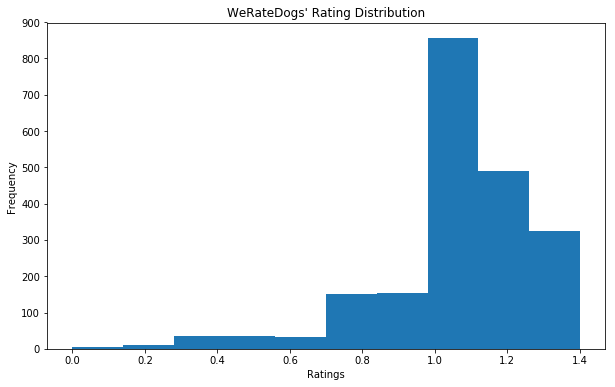

In [56]:
# remove outliers, max level set at 2
df_archive_merged.loc[((df_archive_merged.ratings > 2)), 'ratings'] = np.nan

# plot frequency distribution
df_archive_merged.ratings.plot(kind='hist', figsize=(10, 6));
plt.title('WeRateDogs\' Rating Distribution');
plt.xlabel('Ratings');
print('''
mean rating = {:.3f}
median rating = {:.3f}
std rating = {:.3f}'''
      .format(df_archive_merged.ratings.mean(), 
              df_archive_merged.ratings.median(), 
              df_archive_merged.ratings.std()))

plt.savefig('img/analysis_1.png')

**Insights:**

The diagram above shows frequency distribution of the ratings tweeted by WeRateDog. During analysis, it is found that there are some outliers which made plotting the histogram not possible. Ratings above 2 were removed from the visualisation as these are rare occurances. 

The frequency distribution is heavily skewed to the left, as the median is greater than the mean rating. Both mean and median ratings are above 1.0. This indicates that WeRateDogs are very generous in their ratings, most likely due to their love for dogs. It is also possible that the dogs submitted to WeRateDogs are very good, since only owners who are proud of their dogs would take time to submit the pictures of their dog to be rated.

**Question 2: What is the correlation between favourite count and retweet count?**

Retweet to Favourite ratio = 0.316


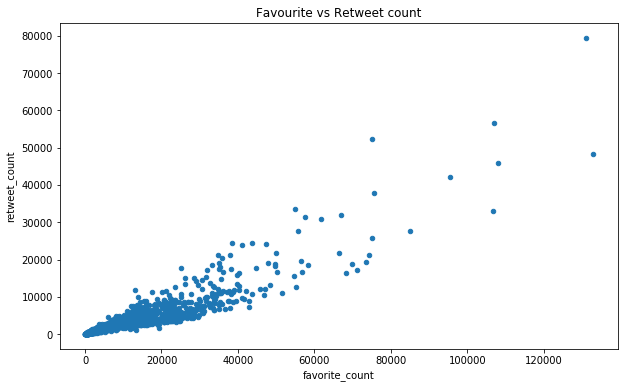

In [57]:
df_archive_merged.plot(kind='scatter', x='favorite_count', y='retweet_count', figsize=(10,6));
plt.title('Favourite vs Retweet count');

plt.savefig('img/analysis_2.png')

avg_retweet_fav = df_archive_merged.retweet_count.mean()/ df_archive_merged.favorite_count.mean()

print('Retweet to Favourite ratio = {:.3f}'.format(avg_retweet_fav))

**Insights:**
The diagram above shows the scatter plot with x-axis as the favorite count and y-axis and the retweet count.
There is strong positive correlation between the favorite count and the retweet count. The spread is lower at low favorite counts as compared to higher favorite counts.

From the scatter plot, we find that Twitter users generally uses the favorite and retweet function side by side, when they encounter the tweet the like.

**Question 3: Does the use of dog_stages affect the favourite and retweet counts?**

We will do a short analysis (A/B Testing) on the effect of using the terms in dogtionary on the likability of the tweet.

The likability of the tweet is indicated by the retweet count and the favourite count

In [58]:
# merge the 2 database to have both the retweet count and the stages
df_analysis = pd.merge(df_archive_merged, df_stages_clean, on='tweet_id')

# create the boolean mask to for different conditions
condition_mask_1 = ((df_analysis.dog_stages == 'None'))
condition_mask_2 = (~(df_analysis.dog_stages == 'None'))

# define normal as the tweets without the use of stages
normal = df_analysis[condition_mask_1]

# define dogtionary as the tweets with the use of stages
dogtionary = df_analysis[condition_mask_2]

# calculate the mean difference in retweet count as observed difference
normal_mean = normal.retweet_count.mean()
dogtionary_mean = dogtionary.retweet_count.mean()
obs_diff = dogtionary_mean - normal_mean

We define our null hypothesis as: mean retweet count for the tweets using words from the dogtionary is the same as the mean retweet counts for the tweets not using words from the dogtionary.

Let N = mean retweet count 

$$H_0: N_{dogtionary} - N_{normal} = 0$$
$$H_1: N_{dogtionary} - N_{normal} \neq 0$$

In [59]:
# single run through 
# sample size is based on the smaller sample group, the tweets with dogtionary
sample_num = len(dogtionary.retweet_count)

# use boot strapping to create more samples
bootsamp_normal = normal.retweet_count.sample(sample_num, replace=True).values
bootsamp_dogtionary = dogtionary.retweet_count.sample(sample_num, replace=True).values

# compute the difference between the different tweets and obtain the mean difference
diff = bootsamp_dogtionary - bootsamp_normal
diff.mean()

1279.4322766570606

In [60]:
# repeat operation over 10,000 times
simulate_num = 10000
sample_num = len(dogtionary.retweet_count)

# save mean diffferences in an array
diff_array = np.zeros(simulate_num)
for i in range(int(simulate_num)):
    bootsamp_normal = normal.retweet_count.sample(sample_num, replace=True).values
    bootsamp_dogtionary = dogtionary.retweet_count.sample(sample_num, replace=True).values
    diff = bootsamp_dogtionary - bootsamp_normal
    diff_array[i] = diff.mean()

In [61]:
# create normal distrubution of samples assuming that the null hypothesis is true
# mean difference is zero
null_diff = np.random.normal(0, diff_array.std(), size=simulate_num)

# calculate the p_value for a two tailed test
p_value = (null_diff > obs_diff).mean() + (null_diff < -obs_diff).mean()


alpha value = 0.05
p value = 0.0074
observed difference = 1190.83


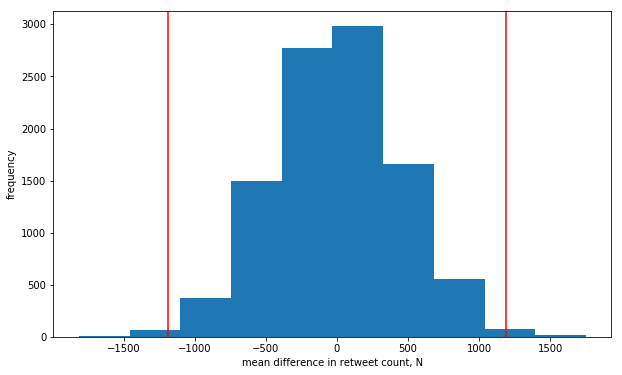

In [62]:
plt.figure(figsize=(10,6))
plt.hist(null_diff);

plt.axvline(obs_diff, c='r');
plt.axvline(-obs_diff, c='r');

plt.xlabel('mean difference in retweet count, N')
plt.ylabel('frequency')

print('''
alpha value = {:.2f}
p value = {:.4f}
observed difference = {:.2f}'''
      .format(0.05, p_value, obs_diff))

plt.savefig('img/analysis_3a.png')

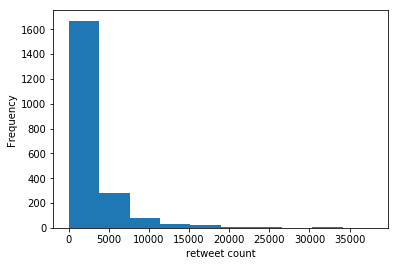

In [63]:
# plotting the distribution of retweet count
# setting a limit of below 40,000 for a better view of the distribution
df_analysis[df_analysis.retweet_count < 40000].retweet_count.plot(kind='hist');
plt.xlabel('retweet count');

plt.savefig('img/analysis_3b.png')

**Insights:**

From the A/B testing above, we obtained a p-value of 0.0076, which is lower than the alpha value. We can reject the null hypothesis which says there is no difference in retweet count between tweets using dogtionary terms and tweets not using them. There is statistical significance in the difference between the retweet counts.

In a practical sense, an increase of ~1200 in the retweet count is relavant as most of the tweets have retweet counts below 10,000. An increase of 1200 would equate to a 10% increase. 

Therefore we suggest the use of terms in dogtionary to increase the retweet counts.